# Composite plot of logs, striplogs, and point data

In this recipe, we'll apply non-regularly sample point data to stratigraphic intervals. It's a kind of intellegent upscaling.

## Point data

From the recipe, [Handling sidewall core data](https://github.com/agile-geoscience/recipes/blob/master/Handling%20sidewall%20core%20data.ipynb), we'll start by making a striplog representing sidewall core porosity.

In [1]:
from striplog import Striplog, Lexicon, Legend
import matplotlib.pyplot as plt
% matplotlib inline

Some things really are point data. Sort of like a log, but irregular, more discrete. For instance we may have some porosity measurements of sidewall core plugs.

In [2]:
data_csv = "data/data_csv.txt"

You must specify `points=True` otherwise Striplog will 'fill in' and create the bases for you, based on the next top.

In [3]:
swc_data = Striplog.from_csv(data_csv, points=True)

When we pass this 'striplog' into `welly.plot()`, it gets treated as a set of points.

In [4]:
import numpy as np
phi = np.array([i.data['porosity'] for i in swc_data])

In [5]:
z = np.array([i.top.middle for i  in swc_data])
z

array([  650.,   700.,   750.,   825.,   875.,   925.,  1000.,  1050.,
        1100.,  1150.,  1200.,  1250.,  1300.,  1350.,  1400.,  1500.,
        1505.,  1510.,  1550.,  1575.,  1600.])

In [6]:
#swc_data.plot(field='porosity', 
#              s=[i.primary.density/100 for i in swc_data], 
#              field_function=lambda x: x/100)

## Stratigraphic data

Read a simple csv of tops into a list.

In [7]:
topsfile = 'data/tops/P-129_tops.csv'

In [8]:
import csv

def get_tops(fname, wellid):
    """
    Get all the tops corrsponding to the first column name of well
    """
    tops = ''
    with open(fname, 'r') as f:
        for line in f.readlines():
            row = line.strip().split(',')
            if row[0] == wellid:
                name = row[1]
                md = row[5]
                tops += md + ', ' + str(name) +  '\n '
    return tops

In [9]:
topslist = get_tops(topsfile, 'P-129')

In [10]:
l = Lexicon.default()
l.formation = [r'\w+']

In [11]:
formations = Striplog.from_descriptions(topslist, lexicon=l, order='auto')
for frm in formations:
    print(frm.summary(fmt='{formation!t}'), frm.top.middle, '-',frm.base.middle)

107.71 m of Lower Windsor 698.33 - 806.04
140.48 m of Horton 806.04 - 946.52
959.83 m of Horton Bluff 946.52 - 1906.35
32.11 m of Maguma 1906.35 - 1938.46
1.00 m of Td 1938.46 - 1939.46


We need to make a legend for our formations, otherwise we won't be able to see it.

In [12]:
strat_str = """colour,  width, comp formation
        #FFFFFF, 1, none
        #9999ff, 1, lower windsor
        #ffcc00, 1, horton
        #cc6600, 1, horton bluff
        #660033, 1, meguma
"""

In [13]:
tops_legend = Legend.from_csv(strat_str)

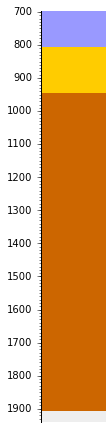

In [14]:
formations.plot(legend=tops_legend, aspect=4.0)

## Make a `striplog` from image

In [15]:
imgfile = "data/images/P-129_280_1935.png"

In [16]:
legend = Legend.default(name='nsdoe')

In [17]:
top, base = 280.0, 1935.0
strip = Striplog.from_image(imgfile, top, base, legend=legend)

## Create a `well` object 

In [18]:
from welly import Well, Curve

In [19]:
well = Well.from_las('data/las/P-129_out.LAS')

In [20]:
curve_legend_csv = """colour,lw,xscale,curve mnemonic
#006400,1.0,linear,GR
#000000,1.0,log,RLA5
#000000,1.0,linear,RHOB
#CCFFCC,1.0,linear,NPHI_SAN
blue,1.0,linear,DT
green,1.0,linear,DTS
"""
curve_legend = Legend.from_csv(curve_legend_csv)

Add our `formations` and `swc_porosity` to the `well`

In [21]:
well.data['FM'] = formations
well.data['SWC_PHI'] = swc_data
well.data['strip'] = strip

In [22]:
# let's look a these tracks

In [23]:
complete_legend = tops_legend + curve_legend + legend

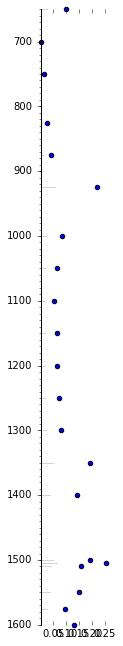

In [24]:
%matplotlib inline
well.data['SWC_PHI'].plot(field='porosity', aspect=6)

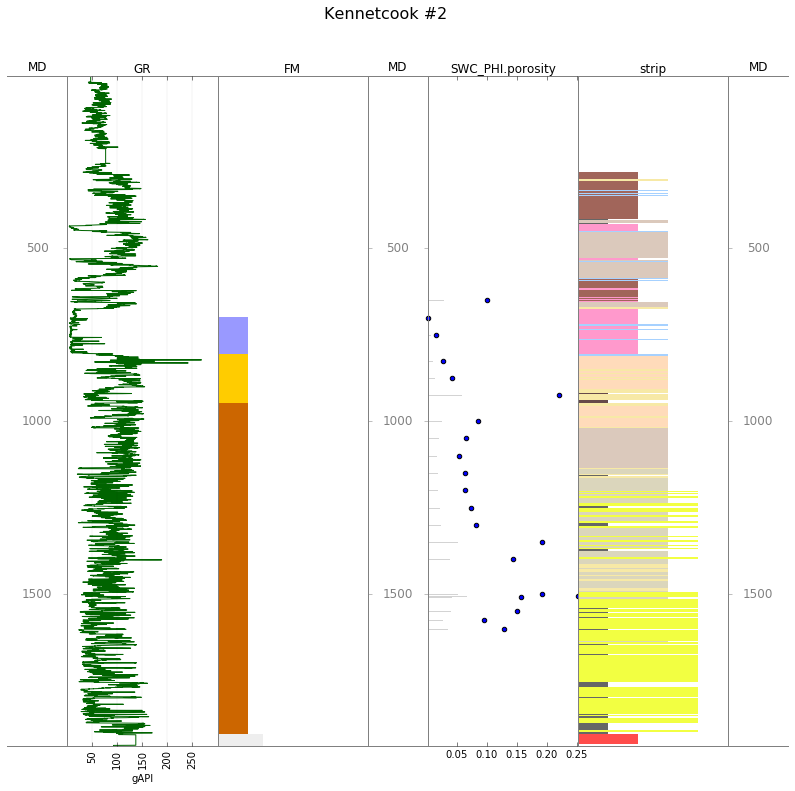

In [26]:
tracks = ['MD','GR','FM','MD','SWC_PHI.porosity','strip','MD']
well.plot(tracks=tracks, legend=complete_legend)